## Unsupervised Learning | Project-2

### Context
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.
The vehicle may be viewed from one of many different angles.

### Data Description
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of
vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more
difficult to distinguish between the cars.

All the features are numeric i.e. geometric features extracted from the silhouette.

### Project Objective
Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the
model using just the raw data.

### Import Libraries

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [262]:
dfvechile = pd.read_csv("vehicle-1.csv")
dfvechile.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [263]:
dfvechile.shape

(846, 19)

<b>Observation:</b>
- There are 846 rows and 19 attributes.

### Understanding Attributes

In [264]:
dfvechile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

<b>Observation:</b>
- There are some missing values in circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 and skewness_about.2.
- Class is object datatypes while rest of the attributes are numeric. 

In [265]:
# Checking missing values
dfvechile.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

<b>Observation:</b>
- There are some missing values in circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 and skewness_about.2.

In [266]:
# Checking total record count for each class in target variable
dfvechile["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

<b>Observation:</b>
- There are three unique values in Class attribute

#### Handling missing values

In [267]:
# Replacing NaN with group median value

col=['circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio','scatter_ratio','elongatedness',
             'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
             'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2']

for item in col:
    dfvechile[item].fillna(dfvechile.groupby('class')[item].transform('median'),inplace=True)

In [268]:
# Confirm that any missing values still persist
dfvechile.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [269]:
# Five points summary
dfvechile.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.826241    6.134340   33.0   40.00   
distance_circularity         846.0   82.066194   15.754263   40.0   70.00   
radius_ratio                 846.0  168.916076   33.427561  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.680851    7.882557   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.920804   33.199802  112.0  147.00   
elongatedness                846.0   40.927896    7.813401   26.0   33.00   
pr.axis_rectangularity       846.0   20.579196    2.590879   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.643026   31.378020  130.0  167.00   
scaled_variance.1            846.0  439.665485  176.492876  184.0  318.25   
scaled_radius_of_gyration    846.0  174.712766   32.546284  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.470873   59.0   67.00   
skewness_about               846.0    6.356974    4.904073    0.0    2.00   
skewness_about.1             846.0   12.604019    8.930921    0.0    5.00   
skewness_about.2             846.0  188.919622    6.152167  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                                50%     75%     max  
compactness                   93.00  100.00   119.0  
circularity                   44.00   49.00    59.0  
distance_circularity          80.00   98.00   112.0  
radius_ratio                 167.25  195.00   333.0  
pr.axis_aspect_ratio          61.00   65.00   138.0  
max.length_aspect_ratio        8.00   10.00    55.0  
scatter_ratio                157.00  198.00   265.0  
elongatedness                 43.00   46.00    61.0  
pr.axis_rectangularity        20.00   23.00    29.0  
max.length_rectangularity    146.00  159.00   188.0  
scaled_variance              179.00  217.00   320.0  
scaled_variance.1            364.00  586.75  1018.0  
scaled_radius_of_gyration    174.00  198.00   268.0  
scaled_radius_of_gyration.1   71.00   75.00   135.0  
skewness_about                 6.00    9.00    22.0  
skewness_about.1              11.00   19.00    41.0  
skewness_about.2             188.00  193.00   206.0  
hollows_ratio                197.00  201.00   211.0

<b>Observation:</b>
- There is no negative values.
- It looks compactness, circularity, max.length_rectangularity and hollows_ratio are approximately normally distributed.
- radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1 are approx. right skewed distribution.

### Univariate Analysis

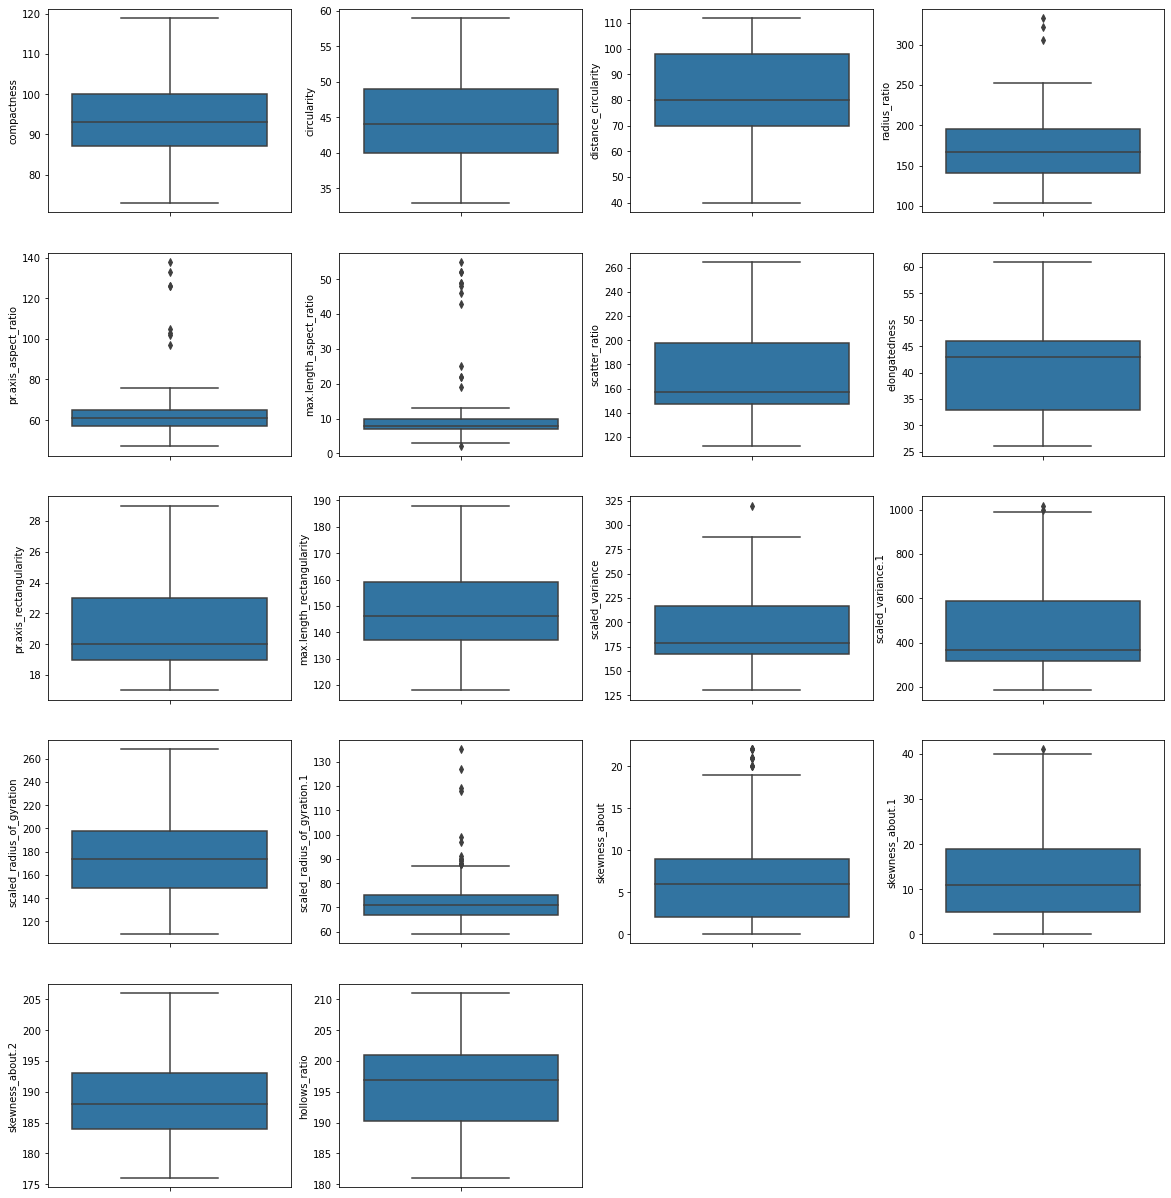

In [270]:
# Plot the Boxplot for each attribute.

col = np.array(dfvechile.columns[0:18])

plt.figure(figsize=(20,80))
for i,col in enumerate(col):
    plt.subplot(18,4,i+1)
    sns.boxplot(dfvechile[col], orient="v", dodge=False, whis=1.5)
    #print("Mean of",col,"is", dfvechile[col].mean())

<b>Observation:</b>
- There are some outliers in radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about and skewness_about.1.  

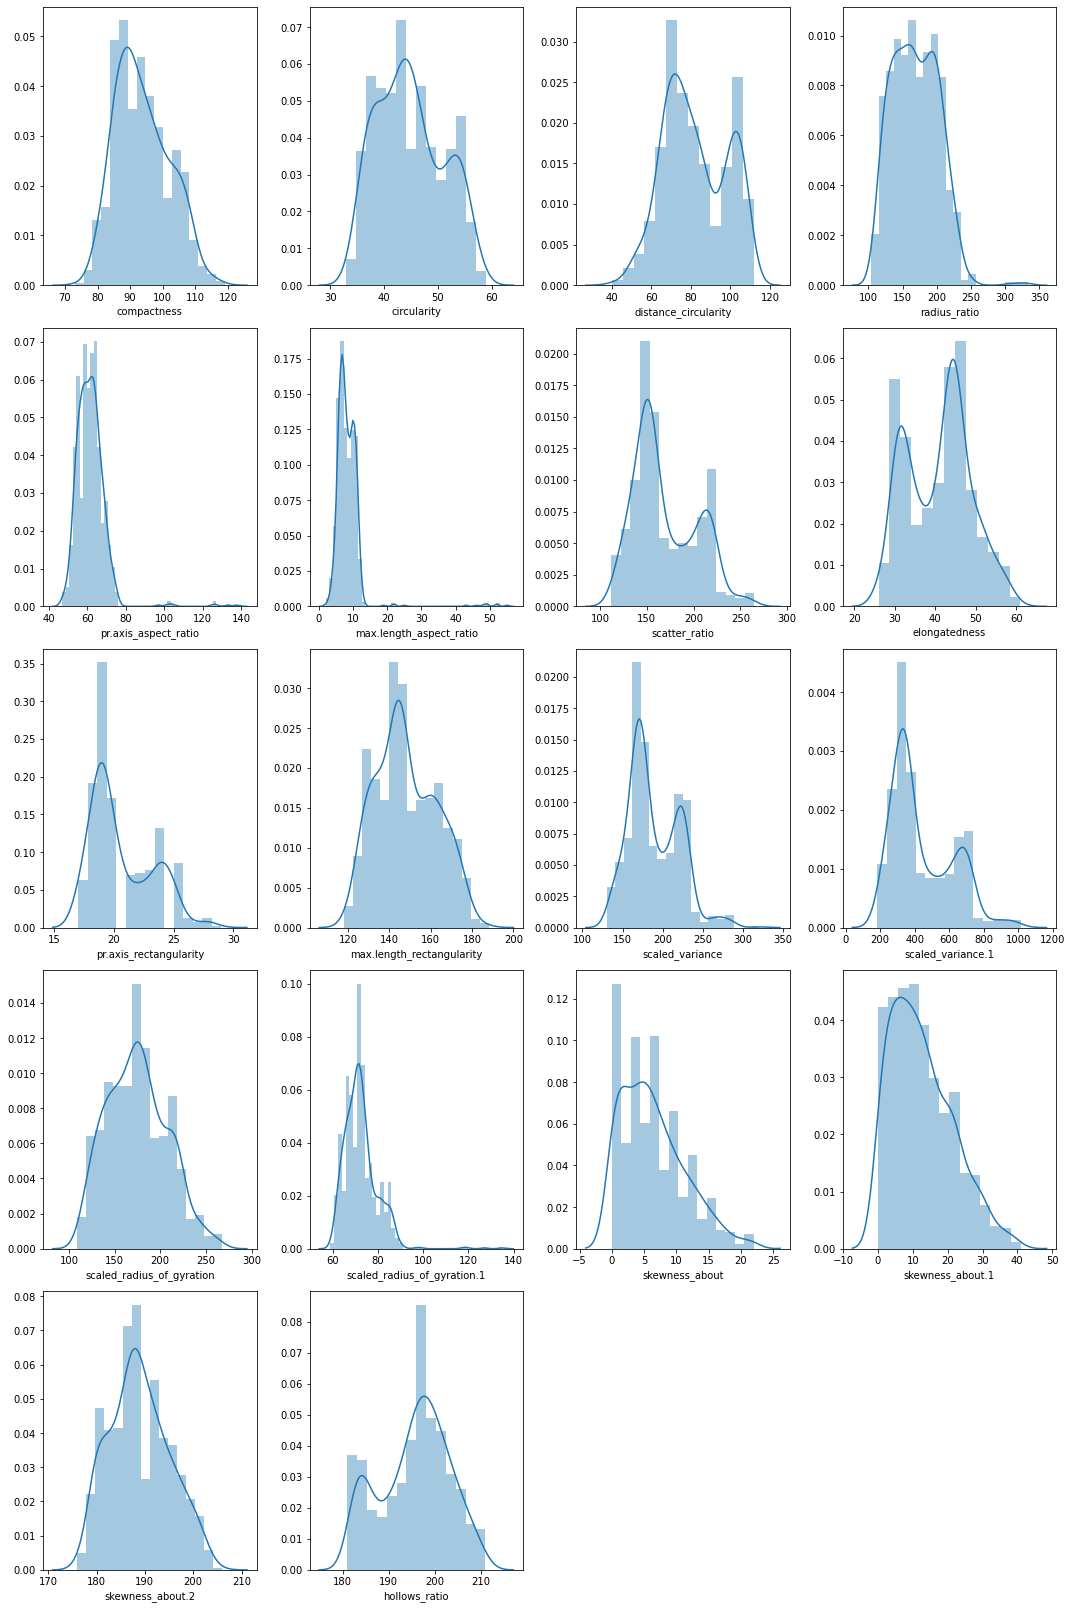

In [271]:
# Plot the distribution graph for each attribute. 
col = np.array(dfvechile.columns[0:18])

plt.figure(figsize=(15,80))
for i,col in enumerate(col):
    plt.subplot(18,4,i+1)
    sns.distplot(dfvechile[col])
    plt.tight_layout()
    #print("Mean of",col,"is", dfvechile[col].mean())

<b>Observation:</b>
- Above graph shows that most of the columns have bimodal distribution of data and some are multimodal.
- radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio and scaled_radius_of_gyration.1 attributes have very long right tail.

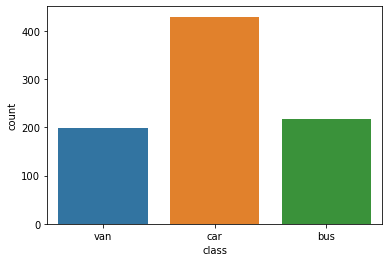

In [272]:
# Plot graph for target variable distribution
sns.countplot(dfvechile['class'])

<b>Observation:</b>
- The count of cars is higher than count of van and bus. It shows that imbalanced target variable. 

### Bivariate Analysis

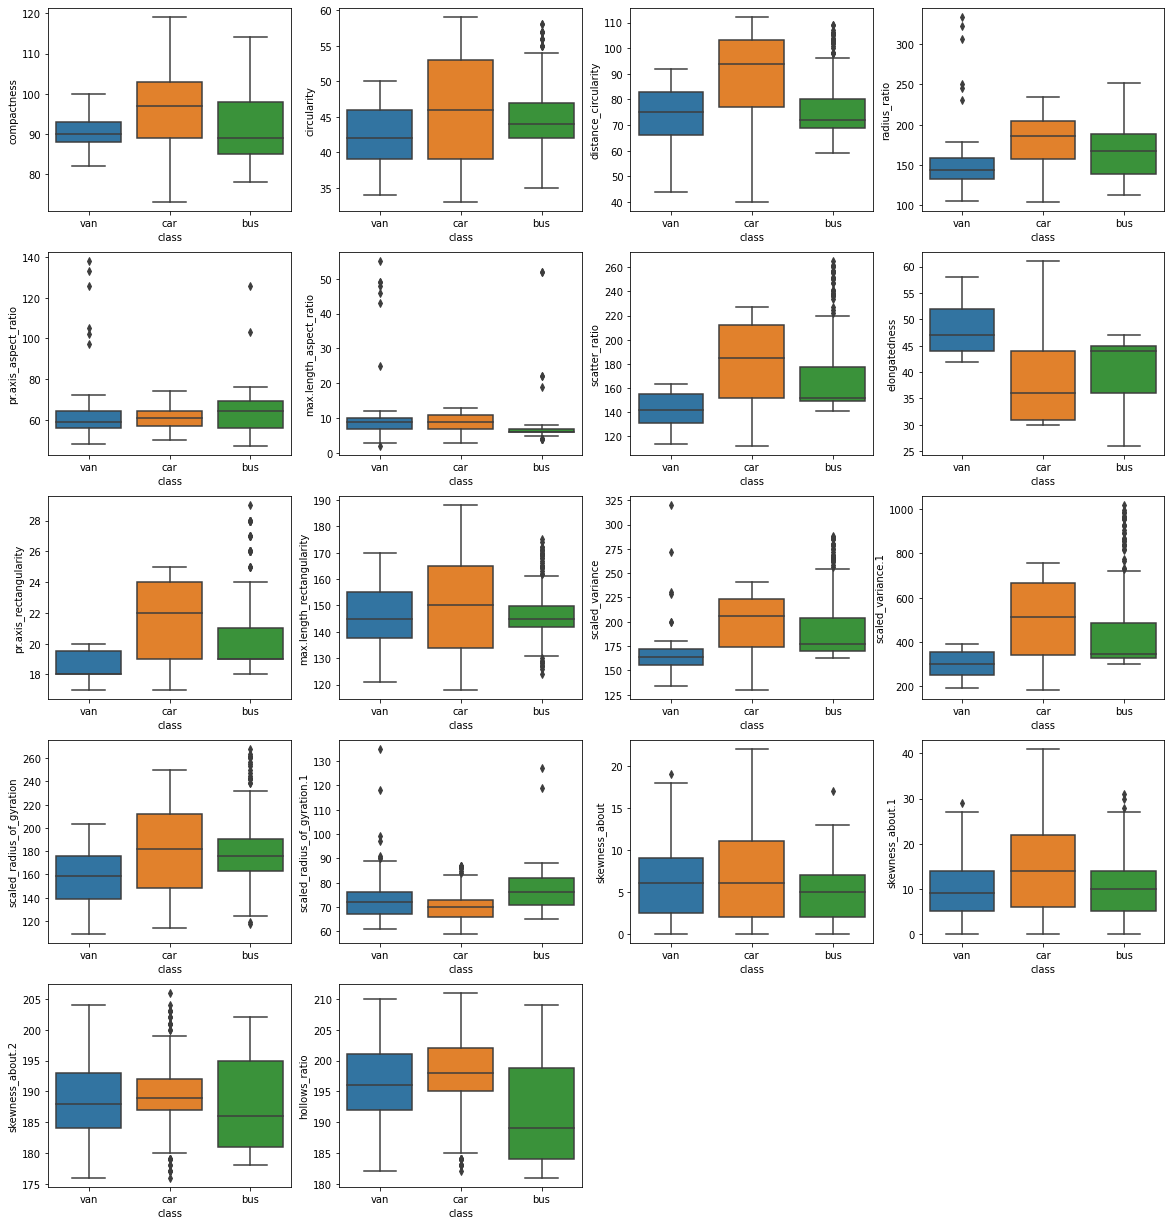

In [273]:
# Plot the distribution for each attribute against target variable.
col = np.array(dfvechile.columns[0:18])

plt.figure(figsize=(20,80))
for i,col in enumerate(col):
    plt.subplot(18,4,i+1)
    sns.boxplot(x='class',y=col,data=dfvechile)
    #print("Mean of",col,"is", dfvechile[col].mean())

<b>Observation:</b>
- The classes are easily separable. 
- Class - Car is having higher compactness, circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration,skewness_about.1 and hollows_ratio values than bus and van. 
- Distribution of elongatedness, skewness_about, distance_circularity, circularity and skewness_about.1  for car seems to be more compared to bus and van. 


#### Correlation Analysis

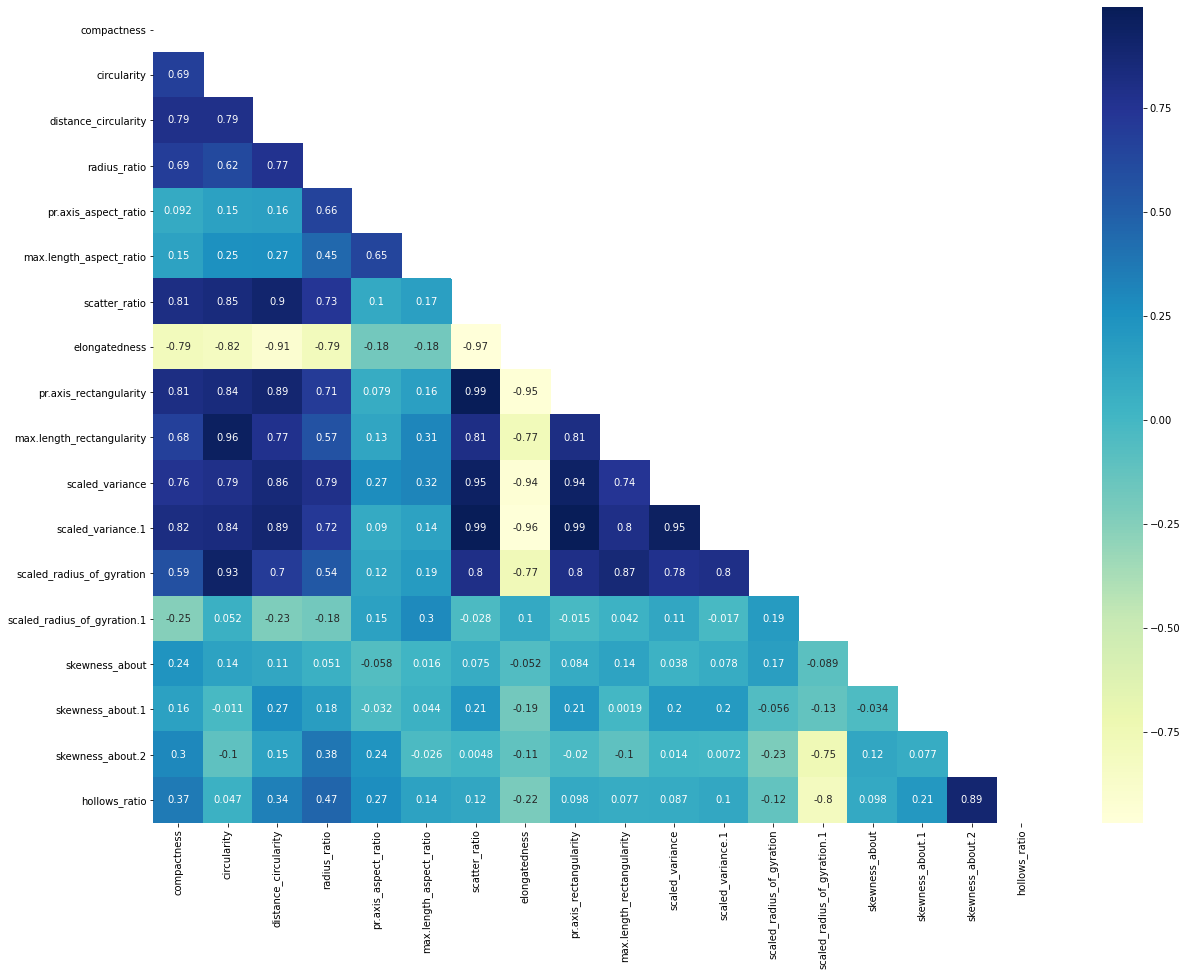

In [274]:
# Plot the correlation graph
plt.figure(figsize=(20,15))

mask = np.triu(np.ones_like(dfvechile.corr(), dtype=np.bool))
sns.heatmap(dfvechile.corr(), annot=True, mask=mask, cmap="YlGnBu" )

<b>Observation:</b>
- Above heatmap shows that there is a lot of possitive correlations between the attributes. 
- Also we can see that elongatedness is most negatively corelated with almost all the data.
- 4 columns (pr.axis_aspect_ratio, max.length_aspect_ratio, skewness_about, skewness_about.1 ) do not have correlation to any other columns which will be directly considered for model. There is a moderate correlation between pr.axis_aspect_ratio and max.length_aspect_ratio. 

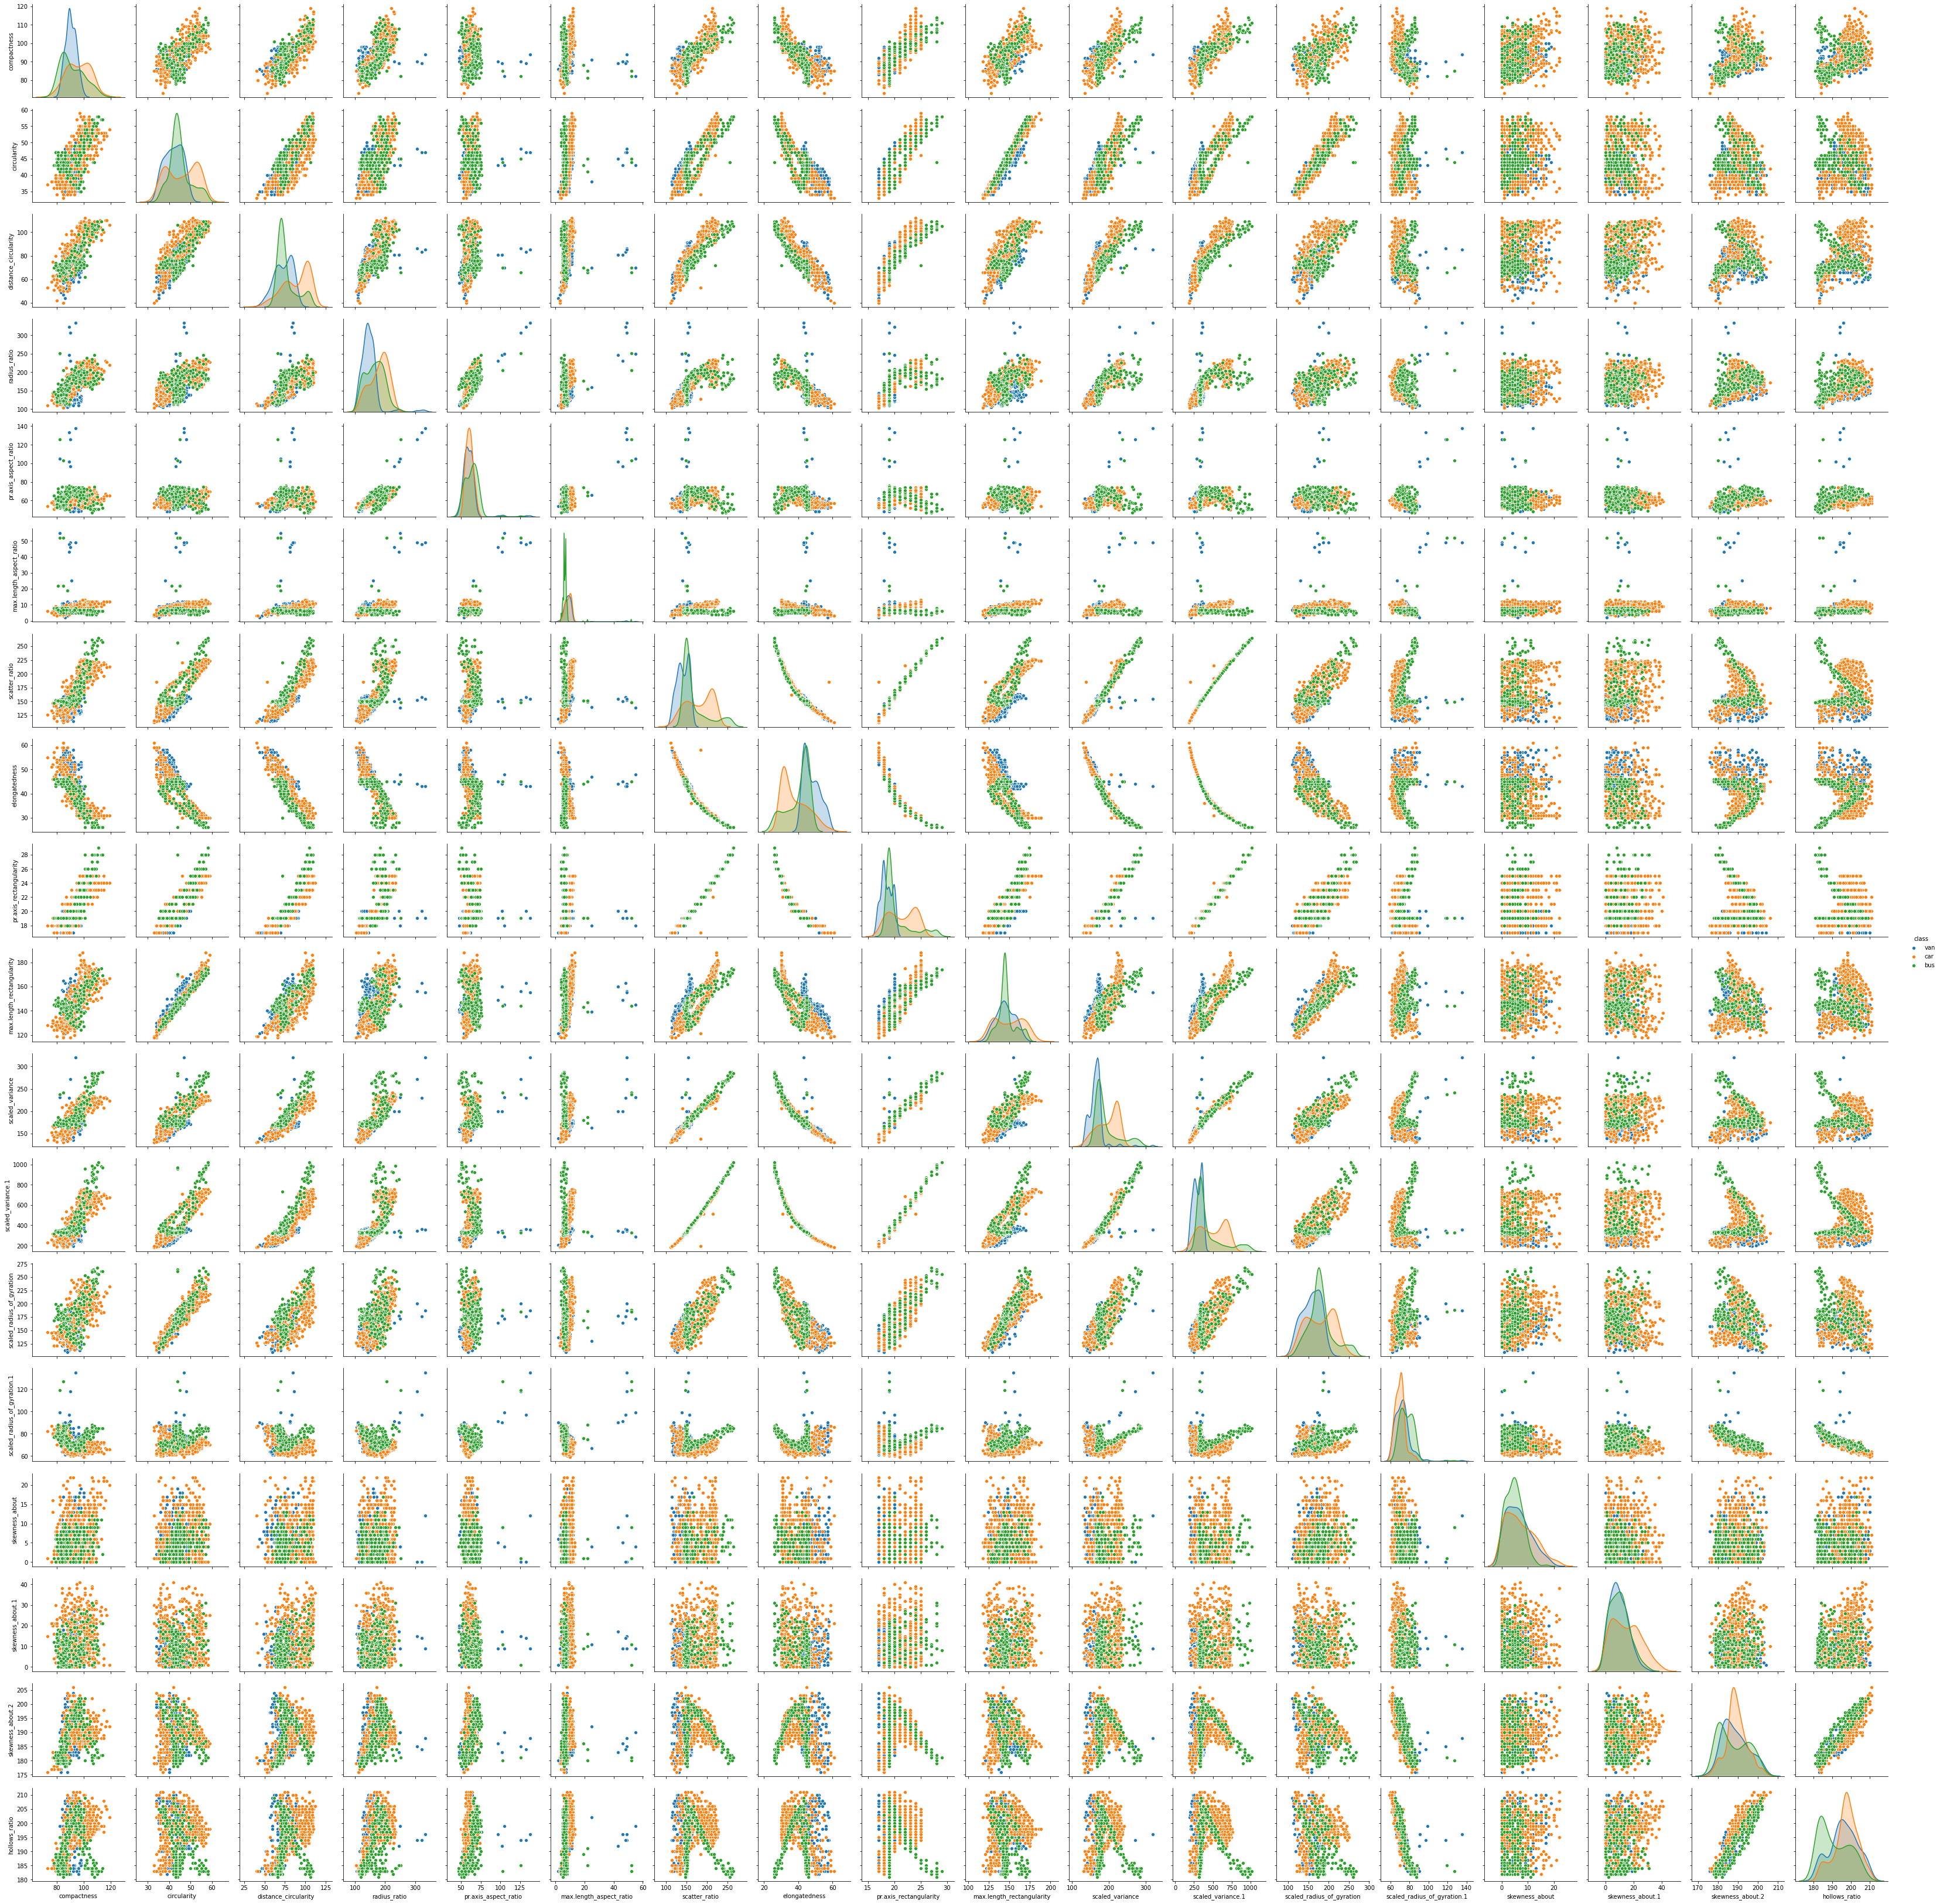

In [275]:
sns.pairplot(dfvechile, hue='class')

<b>Observation:</b>
- It is also showing the same information as correlation matrix.
- compactness has positive linear relationship with circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance1, scaled_variance. compactness has negative linear relationship with elongatedness.
- circularity has positive linear relationship with distance_circularity, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. circularity has negative linear relationship with elongatedness.
- distance_circularity has positive linear relationship with radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. distance_circularity has negative linear relationship with elongatedness.
- radius_ratio has positive linear relationship with pr.axis_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance1, scaled_radius_of_gyration. radius_ratio has negative linear relationship with elongatedness.

### Data Preprocessing

#### Handling Outliers

In [276]:
# Handling outliers using IQR

collst = ['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1',
          'scaled_radius_of_gyration.1','skewness_about','skewness_about.1']


for col in collst:
    q1 = np.percentile(dfvechile[col], 25) #Find the Q1
    q3 = np.percentile(dfvechile[col], 75) #Find the Q2 
    
    # Find the IQR
    iqr = q3 - q1 
    #print("Q1 of", col,":", q1)
    #print("Q3 of", col,":", q3)
    #print("IQR of", col, ":", iqr)

    lowerlimit = q1 - 1.5 * iqr  #Find the lower boundary
    upperlimit = q3 + 1.5 * iqr  #Find the Upper boundary

    print("Lowerlimit of", col, ":", lowerlimit)
    print("Uppperlimit of", col, ":",  upperlimit)
    
    dfvechile[col] = np.where(dfvechile[col] > upperlimit, upperlimit, dfvechile[col]) #Update the upper boundary value
    dfvechile[col] = np.where(dfvechile[col] < lowerlimit, lowerlimit, dfvechile[col]) #Uppdate the lower boundary value



Lowerlimit of radius_ratio : 60.0
Uppperlimit of radius_ratio : 276.0
Lowerlimit of pr.axis_aspect_ratio : 45.0
Uppperlimit of pr.axis_aspect_ratio : 77.0
Lowerlimit of max.length_aspect_ratio : 2.5
Uppperlimit of max.length_aspect_ratio : 14.5
Lowerlimit of scaled_variance : 92.0
Uppperlimit of scaled_variance : 292.0
Lowerlimit of scaled_variance.1 : -84.5
Uppperlimit of scaled_variance.1 : 989.5
Lowerlimit of scaled_radius_of_gyration.1 : 55.0
Uppperlimit of scaled_radius_of_gyration.1 : 87.0
Lowerlimit of skewness_about : -8.5
Uppperlimit of skewness_about : 19.5
Lowerlimit of skewness_about.1 : -16.0
Uppperlimit of skewness_about.1 : 40.0


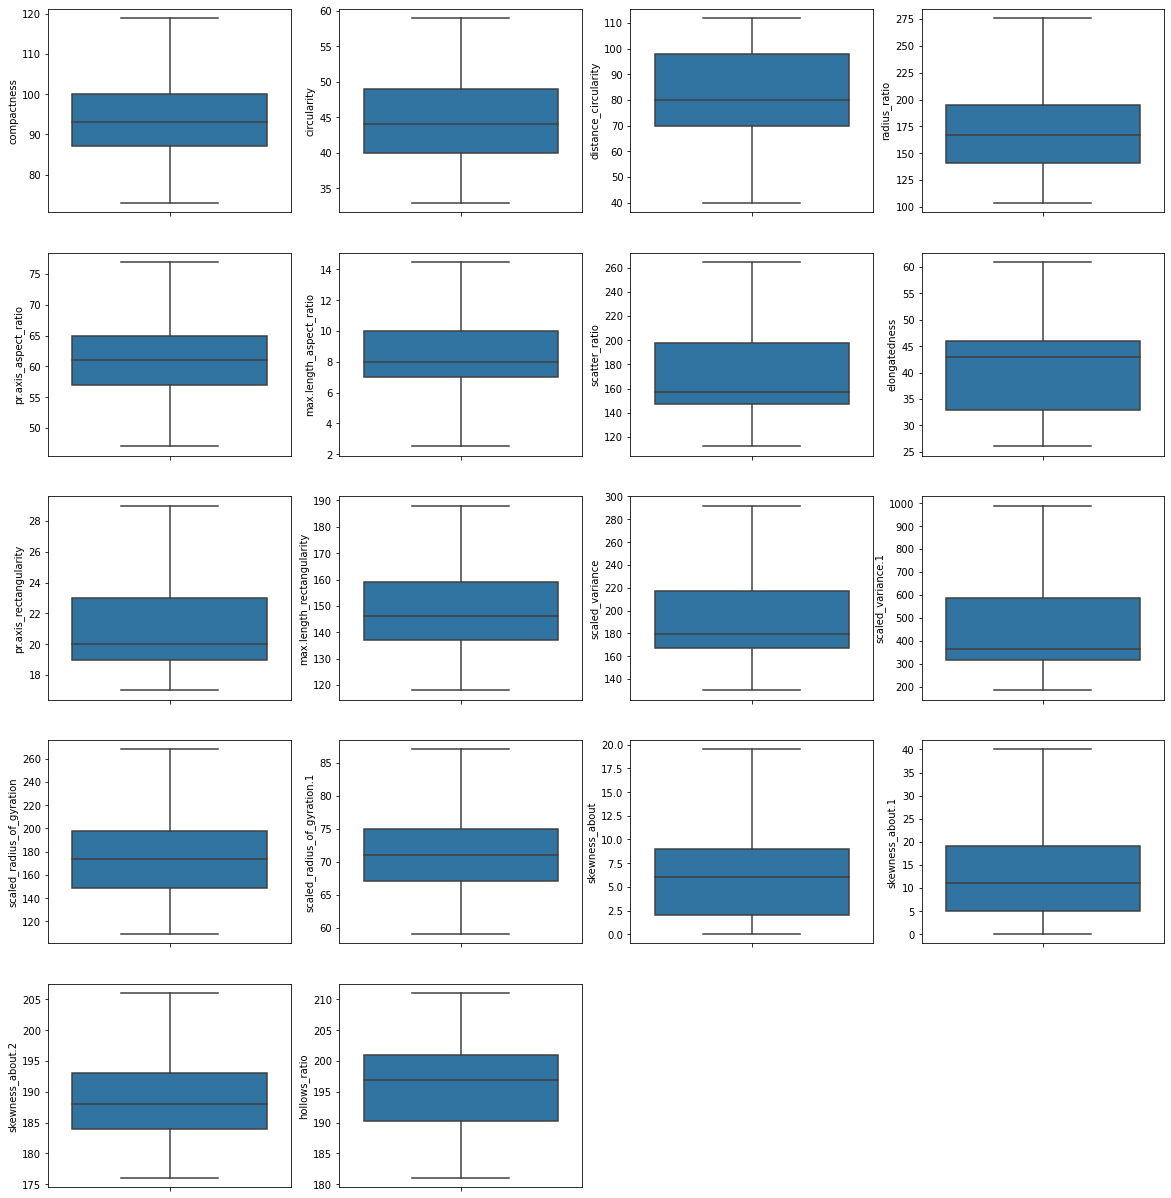

In [277]:
# Checking that outliers are removed

col = np.array(dfvechile.columns[0:18])

plt.figure(figsize=(20,80))
for i,col in enumerate(col):
    plt.subplot(18,4,i+1)
    sns.boxplot(dfvechile[col], orient="v", dodge=False, whis=1.5)
    #print("Mean of",col,"is", dfvechile[col].mean())

<b>Observation:</b>
- There is no outliers found.

#### Apply Label Encoder

In [278]:
#Label encode the target class
labelencoder = LabelEncoder()
dfvechile['class'] = labelencoder.fit_transform(dfvechile['class'])
dfvechile['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

### Model Building without PCA

In [279]:
# Split independed and depended variable
X = dfvechile.drop('class', axis=1)
y = dfvechile['class']

# Split the training and test set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.30, random_state=10)

In [280]:
# Apply scaling using Starndard Scaler
sc = StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)

In [281]:
# Initialize the SVC classifer
svcmodel = SVC(gamma=0.1, C=0.5)
# Train the model
svcmodel.fit(scaledXtrain, y_train)

#Predict the class for test data
prediction = svcmodel.predict(scaledXtest)

In [282]:
# check the accuracy on the training set
print("Training Accuracy:",svcmodel.score(scaledXtrain, y_train))
print("Testing Accuracy:", svcmodel.score(scaledXtest, y_test))
print("Model Accuracy:",accuracy_score(y_test,prediction))

Training Accuracy: 0.9712837837837838
Testing Accuracy: 0.9606299212598425
Model Accuracy: 0.9606299212598425


In [283]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[ 69   0   1]
 [  0 121   3]
 [  2   4  54]]


In [284]:
print("SVM Metrics = \n", classification_report(prediction, y_test))

SVM Metrics = 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.97      0.98      0.97       124
           2       0.93      0.90      0.92        60

    accuracy                           0.96       254
   macro avg       0.96      0.95      0.96       254
weighted avg       0.96      0.96      0.96       254



<b>Observation:</b>
- 69 vechicle predicted as bus correctly and 1 vechicle predicted as van which is incorrect. 
- 121 vechicle predicted as car correctly and 3 vechicle predicted as van which is incorrect. 
- 54 vechicle predicted as van correctly and prediction is incorrect for 6 vechicles. 
- Overall accuracy score is 96%.

### Apply Principle Component Analysis

In [285]:
# Initialize the PCA with 18 components
pca=PCA(n_components=18, random_state=10)

# Train the model 
pca.fit(scaledXtrain)

# Print set of all eigenvectors
print(pca.components_)

[[ 2.72220788e-01  2.88932488e-01  3.01432388e-01  2.68982715e-01
   1.04511499e-01  1.83738899e-01  3.09183466e-01 -3.08272557e-01
   3.06769102e-01  2.82667759e-01  3.00039282e-01  3.06833198e-01
   2.66859745e-01 -3.86810169e-02  3.45139747e-02  6.24933337e-02
   3.40356612e-02  8.21445416e-02]
 [-8.92851504e-02  1.14906553e-01 -4.69378860e-02 -1.89103677e-01
  -2.48391165e-01 -1.17110959e-01  7.79517185e-02 -1.40448313e-02
   8.96154851e-02  1.02190338e-01  8.23372411e-02  8.39887257e-02
   2.00165651e-01  5.01129260e-01 -3.21465468e-02 -7.51731124e-02
  -5.10909277e-01 -5.17646179e-01]
 [ 6.76260689e-02 -1.90133108e-01  1.12613536e-01 -1.12728594e-01
  -4.00588954e-01 -7.14057425e-02  1.10718084e-01 -6.27142647e-02
   1.21930087e-01 -1.68637309e-01  7.17569699e-02  1.09348778e-01
  -2.10127058e-01 -5.43564730e-02 -1.66990754e-01  7.84415957e-01
  -3.36721286e-02  1.66396323e-02]
 [-2.01483474e-01 -6.17267831e-02 -3.66125078e-02  2.44801189e-01
   4.88273908e-01 -1.01336538e-02  6.

In [286]:
pca.explained_variance_

array([9.74633782e+00, 3.27951922e+00, 1.16941162e+00, 1.16170806e+00,
       8.56353374e-01, 7.59772384e-01, 3.48773405e-01, 2.23295749e-01,
       1.35631090e-01, 9.77342314e-02, 6.50081726e-02, 5.88710494e-02,
       4.22540585e-02, 3.06861546e-02, 2.20390814e-02, 1.94864664e-02,
       9.09592404e-03, 4.47898685e-03])

In [287]:
pca.explained_variance_ratio_

array([5.40548578e-01, 1.81887750e-01, 6.48575703e-02, 6.44303177e-02,
       4.74948240e-02, 4.21382769e-02, 1.93435700e-02, 1.23843644e-02,
       7.52233239e-03, 5.42050777e-03, 3.60546453e-03, 3.26508917e-03,
       2.34348241e-03, 1.70190666e-03, 1.22232518e-03, 1.08075278e-03,
       5.04475517e-04, 2.48412277e-04])

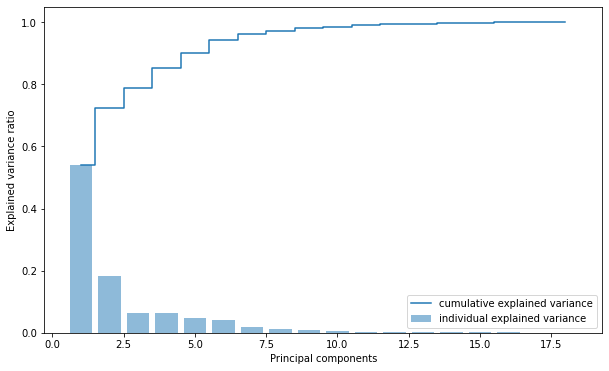

In [288]:
#Graph of individual explained variance and cumulative explained variance against Principal Components
fig = plt.figure(figsize = (10,6))
plt.bar(range(1,19), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),np.cumsum(pca.explained_variance_ratio_), where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')

In [289]:
for n in range(0, scaledXtrain.shape[1]):
    print(f"Variance explained by the first {n+1} principal components = {np.cumsum(pca.explained_variance_ratio_ *100)[n]:.1f}%")

Variance explained by the first 1 principal components = 54.1%
Variance explained by the first 2 principal components = 72.2%
Variance explained by the first 3 principal components = 78.7%
Variance explained by the first 4 principal components = 85.2%
Variance explained by the first 5 principal components = 89.9%
Variance explained by the first 6 principal components = 94.1%
Variance explained by the first 7 principal components = 96.1%
Variance explained by the first 8 principal components = 97.3%
Variance explained by the first 9 principal components = 98.1%
Variance explained by the first 10 principal components = 98.6%
Variance explained by the first 11 principal components = 99.0%
Variance explained by the first 12 principal components = 99.3%
Variance explained by the first 13 principal components = 99.5%
Variance explained by the first 14 principal components = 99.7%
Variance explained by the first 15 principal components = 99.8%
Variance explained by the first 16 principal comp

<b>Observation:</b>
- First 8 principal components explain 97.3% of the variance in the data.

In [290]:
# Apply the PCA with 8 principle components
pca_comp = PCA(n_components=8)
X_pca = pca_comp.fit_transform(scaledXtrain)
X_train_pca=pd.DataFrame(X_pca,columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8'])

X_train_pca.shape

(592, 8)

In [291]:
#Applying on test data
X_test_pca=pca_comp.transform(scaledXtest)
X_test_pca=pd.DataFrame(X_test_pca,columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8'])

X_test_pca.shape

(254, 8)

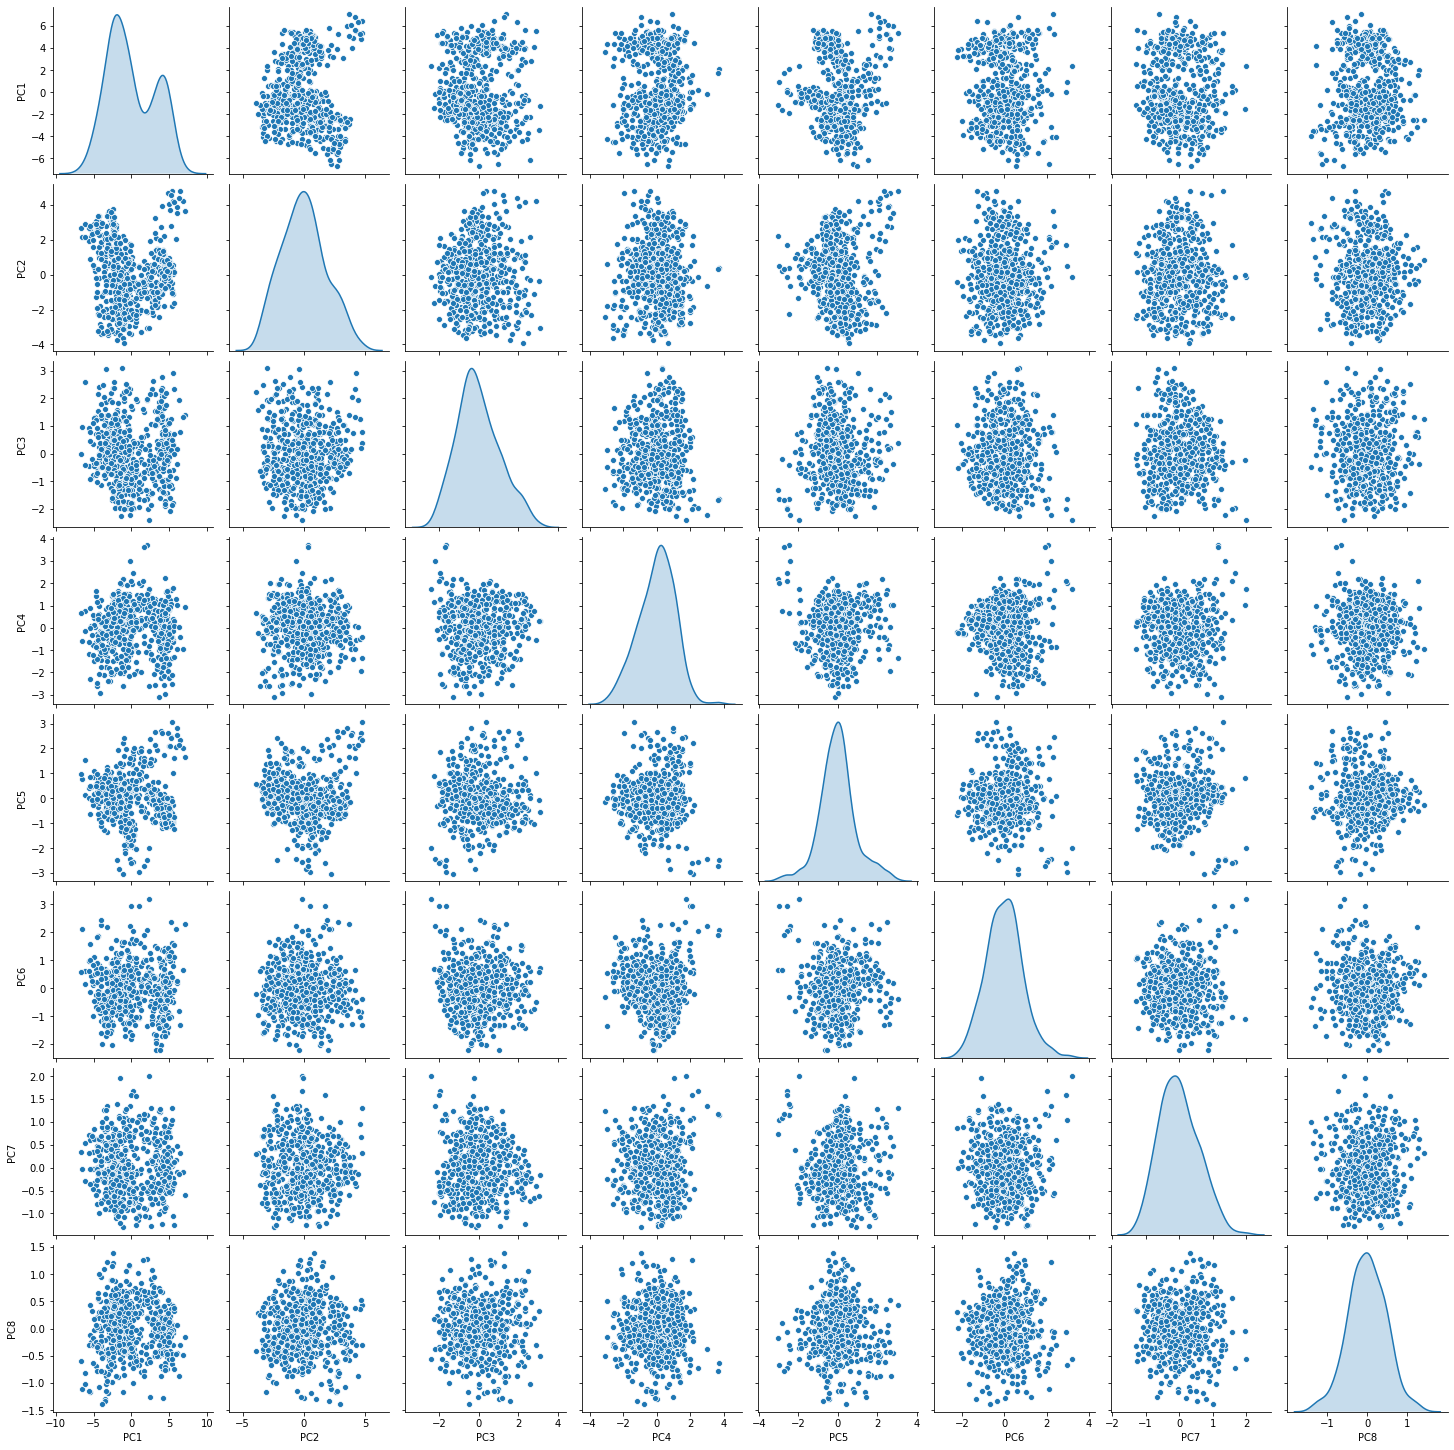

In [293]:
# Pairplot with PCA values
sns.pairplot(X_train_pca, diag_kind='kde')

<b>Observation:</b>
- Now, there are almost no correlation between independent attributes but there are some attributes which shows some correlation. The reason behind this is that some attributes in data are less correlated but we still taken that for dimentionality reduction. The solution may be we can remove columns which are less correlated then apply PCA.

### Building Model with PCA Components

In [294]:
svcmodel = SVC(gamma=0.1, C=0.5)
svcmodel.fit(X_train_pca, y_train)

prediction = svcmodel.predict(X_test_pca)

# check the accuracy on the training set
print("Training Accuracy:",svcmodel.score(X_train_pca, y_train))
print("Testing Accuracy:",svcmodel.score(X_test_pca, y_test))
print("Accuracy Score:",accuracy_score(y_test,prediction))



Training Accuracy: 0.9594594594594594
Testing Accuracy: 0.9409448818897638
Accuracy Score: 0.9409448818897638


In [295]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[ 66   0   1]
 [  3 119   3]
 [  2   6  54]]


In [296]:
print("SVM Metrics = \n", classification_report(prediction, y_test))

SVM Metrics = 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.95      0.95      0.95       125
           2       0.93      0.87      0.90        62

    accuracy                           0.94       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254



#### Model Comparison between with PCA and without PCA

- There is a slight decrease in test data accuracy from 96% to 94% when PCA variables are used.
- <b>Without PCA:</b> 
    - Model built with 18 attributes and got the score 96%.  
    - 69 vechicle predicted as bus correctly and 1 vechicle predicted as van which is incorrect.
    - 121 vechicle predicted as car correctly and 3 vechicle predicted as van which is incorrect.
    - 54 vechicle predicted as van correctly and prediction is incorrect for 6 vechicles.
- <b>With PCA:</b>
    - Extracted hidden information from given attributes and identified 8 optimal principle components and built the model. It gives accurcay 94%. However, this is really a great score on unseen data. 
    - 69 vechicle predicted as bus correctly and 1 vechicle predicted as van which is incorrect.
    - 119 vechicle predicted as car correctly. 3 vechicles predicted as bus and 3 vechiles predicted as van which is incorrect.
    - 54 vechicle predicted as van correctly and prediction is incorrect for 8 vechicles.
    

## PART 2

### Context:
Company X is a sports management company for international cricket.

### Attribute Information:
1. Runs: Runs score by the batsman
2. Ave: Average runs scored by the batsman per match
3. SR: strike rate of the batsman
4. Fours: number of boundary/four scored
5. Six: number of boundary/six scored
6. HF: number of half centuries scored so far

### Project Objective:
Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

### Import Libraries

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [298]:
# Read the dataset and store into dataframe
dfcricket = pd.read_csv("batting_bowling_ipl_bat.csv")
dfcricket.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

<b>Observation:</b>
- There are missing values in rows. 

In [299]:
dfcricket.shape

(180, 7)

<b>Observation:</b>
- 180 rows and 7 attributes

In [300]:
dfcricket[dfcricket.isnull().any(1)]

Name  Runs  Ave  SR  Fours  Sixes  HF
0    NaN   NaN  NaN NaN    NaN    NaN NaN
2    NaN   NaN  NaN NaN    NaN    NaN NaN
4    NaN   NaN  NaN NaN    NaN    NaN NaN
6    NaN   NaN  NaN NaN    NaN    NaN NaN
8    NaN   NaN  NaN NaN    NaN    NaN NaN
..   ...   ...  ...  ..    ...    ...  ..
170  NaN   NaN  NaN NaN    NaN    NaN NaN
172  NaN   NaN  NaN NaN    NaN    NaN NaN
174  NaN   NaN  NaN NaN    NaN    NaN NaN
176  NaN   NaN  NaN NaN    NaN    NaN NaN
178  NaN   NaN  NaN NaN    NaN    NaN NaN

[90 rows x 7 columns]

<b>Observation:</b>
- There are duplicated empty rows in the dataset. 

In [301]:
# Dropping empty rows
dfcricket.dropna(axis=0, inplace=True)

In [302]:
dfcricket.shape

(90, 7)

<b>Observation:</b>
- Finally, there are 90 rows and 7 attributes.

In [303]:
dfcricket.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
7   CL White  479.0  43.54  149.68   41.0   20.0  5.0
9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0

In [304]:
# Reset the row index
dfcricket = dfcricket.reset_index(drop=True)
dfcricket

Name   Runs    Ave      SR  Fours  Sixes   HF
0      CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
1     G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
2      V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
3      CL White  479.0  43.54  149.68   41.0   20.0  5.0
4      S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0
..          ...    ...    ...     ...    ...    ...  ...
85       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0
86   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0
87  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0
88     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0
89     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0

[90 rows x 7 columns]

In [305]:
dfcricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.0+ KB


<b>Observation:</b>
- Dataype for all the attributes is float except Name attribute. 
- There is no missing value. 

In [306]:
#Five points summary
dfcricket.describe().T

count        mean         std    min      25%      50%       75%  \
Runs    90.0  219.933333  156.253669   2.00   98.000  196.500  330.7500   
Ave     90.0   24.729889   13.619215   0.50   14.665   24.440   32.1950   
SR      90.0  119.164111   23.656547  18.18  108.745  120.135  131.9975   
Fours   90.0   19.788889   16.399845   0.00    6.250   16.000   28.0000   
Sixes   90.0    7.577778    8.001373   0.00    3.000    6.000   10.0000   
HF      90.0    1.188889    1.688656   0.00    0.000    0.500    2.0000   

          max  
Runs   733.00  
Ave     81.33  
SR     164.10  
Fours   73.00  
Sixes   59.00  
HF       9.00

<b>Observation:</b>
- Fours, Runs and HF attributes are right skewed. 

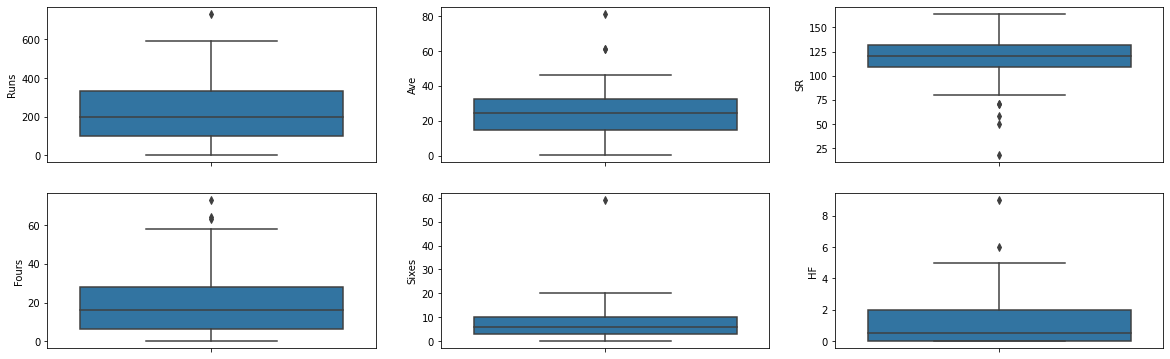

In [307]:
# Plot the Boxplot for each attribute
cols = ['Runs', 'Ave', 'SR','Fours','Sixes','HF']

plt.figure(figsize=(20,20))
for i,col in enumerate(cols):
    plt.subplot(6,3,i+1)
    sns.boxplot(dfcricket[col], orient="v", dodge=False, whis=1.5)
    #print("Mean of",col,"is", dfvechile[col].mean())

<b>Observation:</b>
- There are outliers in Runs, Ave, SR, Fours, Sixes and HF. 

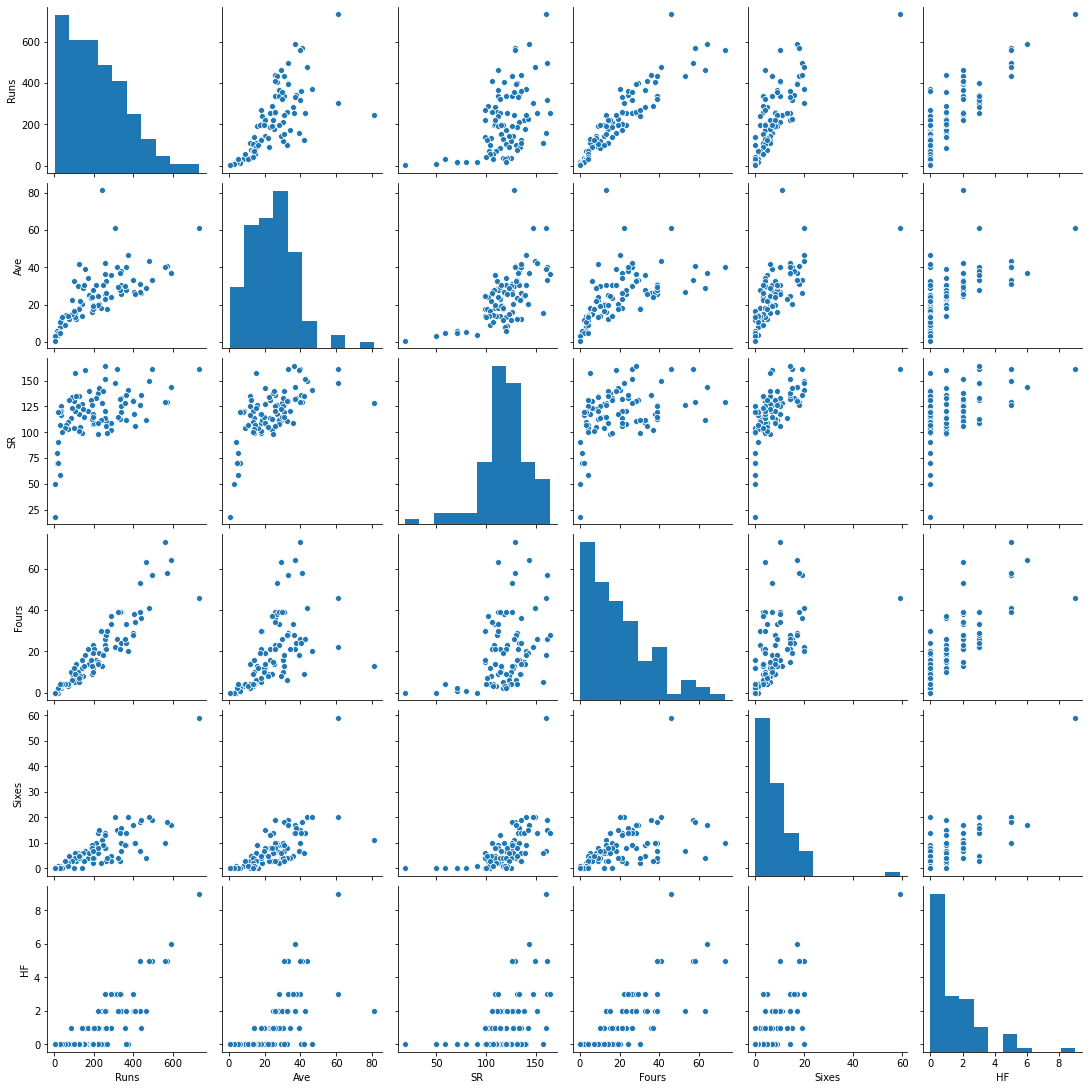

In [308]:
sns.pairplot(dfcricket)

<b>Observation:</b>
- The plot shows that Runs is having linear relationship with Fours, Sixes, Ave.

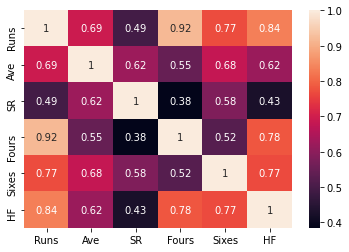

In [309]:
sns.heatmap(dfcricket.corr(), annot=True)

<b>Observation:</b>
- Runs is highly correlated with Fours. Also, it is correlated with Ave, Sixes and HF. 
- Ave is correlated with Sixes, HF and SR. 
- SR is having weak corelation with HF, Fours and Runs. 
- HF is having strong correlation with Sixes and Fours. 

In [310]:
# Dropping Name attribute
X_train = dfcricket.drop(['Name'], axis=1)

In [311]:
# Scale the dataset
sc = StandardScaler()
scaledXtrain = sc.fit_transform(X_train)

In [312]:
# Initialize the PCA with 6 components
pca1=PCA(n_components=6, random_state=10)

# Train the model 
pca_data = pca1.fit_transform(scaledXtrain)

# Print set of all eigenvectors
print(pca1.components_)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]
 [ 0.45840889 -0.10122837 -0.11890348  0.09676885  0.39458014 -0.77486668]
 [ 0.70483594 -0.0606373   0.05624934 -0.58514214 -0.35786211  0.16096217]]


In [313]:
pca1.explained_variance_

array([4.30252561, 0.83636692, 0.41665751, 0.32912443, 0.16567829,
       0.01706297])

In [314]:
pca1.explained_variance_ratio_

array([0.70911996, 0.13784566, 0.06867133, 0.05424458, 0.02730624,
       0.00281223])

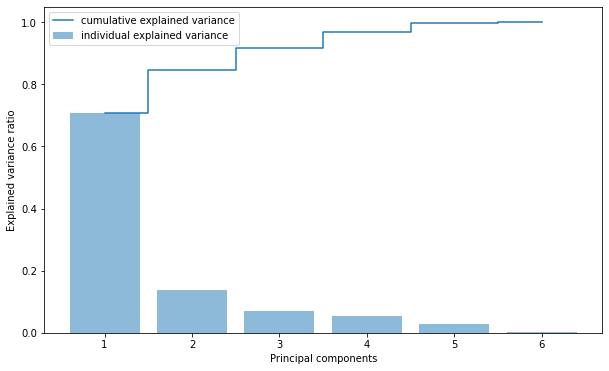

In [315]:
#Graph of individual explained variance and cumulative explained variance against Principal Components
fig = plt.figure(figsize = (10,6))
plt.bar(range(1,7), pca1.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),np.cumsum(pca1.explained_variance_ratio_), where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')

<b>Observation:</b>
- Above plot shows that almost 71% of the Total Variability can be explained by this first principal component. First principal component as the general-batting-performance-index, which is a type of weighted average of all six variables used. Here, the coefficients of the first principal component are all positive, so larger values indicate better player performance. This justifies that we should rank (largest to smallest) the players based on the first principal component. 

In [316]:
# Initialize the PCA with 1 component
pca2=PCA(n_components=1, random_state=10)

# Train the model 
pca_data = pca2.fit_transform(scaledXtrain)

# Print set of all eigenvectors
print(pca2.components_)

[[0.4582608  0.39797313 0.3253838  0.40574167 0.41733459 0.43237178]]


In [317]:
PCA_DF=pd.DataFrame(data=pca_data,columns = ['PCA Value'])

# Add the players name from original dataset
PCA_DF["Name"] = dfcricket["Name"]

#Find the ranking based on PCA value
PCA_DF["Rank"] = PCA_DF["PCA Value"].rank(method ='min', ascending=False)

# Sort the ranking
PCA_DF.sort_values(['Rank'], axis=0, ascending=True).head(50)

PCA Value             Name  Rank
0    8.516774         CH Gayle   1.0
1    4.618340        G Gambhir   2.0
2    4.142251         V Sehwag   3.0
4    4.120072         S Dhawan   4.0
5    4.024436        AM Rahane   5.0
3    3.899411         CL White   6.0
7    2.919015        RG Sharma   7.0
6    2.879281     KP Pietersen   8.0
8    2.327389   AB de Villiers   9.0
12   2.125167     F du Plessis  10.0
10   2.083281        DA Warner  11.0
9    2.081642        JP Duminy  12.0
13   1.938872          OA Shah  13.0
16   1.869895         SK Raina  14.0
19   1.834522         R Dravid  15.0
15   1.817132        DJ Hussey  16.0
18   1.795785    Mandeep Singh  17.0
11   1.776943        SR Watson  18.0
14   1.727636         DJ Bravo  19.0
17   1.449317        AT Rayudu  20.0
24   1.386346       RV Uthappa  21.0
21   1.281113          M Vijay  22.0
22   1.236725        SPD Smith  23.0
25   1.181097         SE Marsh  24.0
32   1.096419        JH Kallis  25.0
27   1.043562  DMD Jayawardene  26.0
23   1.033747       TM Dilshan  27.0
28   1.029168          V Kohli  28.0
30   0.879976     SR Tendulkar  29.0
33   0.860131         MS Dhoni  30.0
20   0.685215         DR Smith  31.0
26   0.683734       KA Pollard  32.0
31   0.669650       MEK Hussey  33.0
29   0.531600       MA Agarwal  34.0
35   0.464752         JD Ryder  35.0
34   0.323935         MS Bisla  36.0
36   0.259177         BJ Hodge  37.0
37   0.249989          NV Ojha  38.0
40   0.088309      BB McCullum  39.0
39  -0.048071     AC Gilchrist  40.0
38  -0.201160           DB Das  41.0
46  -0.289488        MK Tiwary  42.0
42  -0.358365    Azhar Mahmood  43.0
41  -0.366643        IK Pathan  44.0
44  -0.386336      S Badrinath  45.0
52  -0.542597     JEC Franklin  46.0
48  -0.542990      LRPL Taylor  47.0
43  -0.561062        MK Pandey  48.0
60  -0.580260       SC Ganguly  49.0
57  -0.583111       KD Karthik  50.0

<b>Observation:</b>
- PCA helps to find the hiddeen information in the dataset and reduced the multicolinearity. We could rank the players based on their hidden performance metrics. 

## PART 3

### Dimensionality Reduction Techniques

#### 1. Missing Value Ratio

- Given dataset, data columns with more missing values are unlikely to carry much useful information. Thus data columns with number of missing values greater than a given threshold can be removed. The higher the threshold, the more aggressive the reduction. 

In [318]:
## Sample implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train=pd.read_csv("vehicle-1.csv")

# checking the percentage of missing values in each variable
train.isnull().sum()/len(train)*100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In above example, lets assume the threshold limit is 50% and remove the variable having more than 50% missing values. 

##### 2. Low Variance Filter
We can calculate the variance for each attribute and remove the attributes which are having lower variance than threshold limit. A word of caution: variance is range dependent; therefore normalization is required before applying this technique.  

In [319]:
# Sample implementation
train.var()

compactness                       67.806566
circularity                       37.849219
distance_circularity             248.954492
radius_ratio                    1123.603672
pr.axis_aspect_ratio              62.275189
max.length_aspect_ratio           21.171195
scatter_ratio                   1103.226122
elongatedness                     61.092759
pr.axis_rectangularity             6.723302
max.length_rectangularity        210.704141
scaled_variance                  986.651147
scaled_variance.1              31211.194508
scaled_radius_of_gyration       1061.769728
scaled_radius_of_gyration.1       56.043045
skewness_about                    24.212787
skewness_about.1                  79.853549
skewness_about.2                  37.893990
hollows_ratio                     55.335707
dtype: float64

#### 3. High Correlation filter
Dimensions exhibiting higher correlation can lower down the performance of a model. Moreover, it is not good to have multiple variables of similar information. You can use Pearsoncorrelation matrix to identify the variables with high correlation. And select one of them using VIF (Variance Inflation Factor). Variables having a higher value ( VIF > threshold ) can be dropped. As a general guideline, we should keep those variables which show a decent or high correlation with the target variable.

In [320]:
# Sample implementation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.DataFrame(
    {'a': [1, 1, 2, 3, 4],
     'b': [2, 2, 3, 2, 1],
     'c': [4, 6, 7, 8, 9],
     'd': [4, 3, 4, 5, 4]}
)

X = add_constant(df)
X = df.assign(const=1)

#Print VIF
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

a         22.950
b          3.000
c         12.950
d          3.000
const    136.875
dtype: float64

#### 4. Random Forest
Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features. 

In [321]:
# Sample implementation
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("batting_bowling_ipl_bat.csv")

df.dropna(axis=0, inplace=True)

X = df.drop("Name", axis=1)
y = df["Name"]

model = RandomForestClassifier(random_state=1, max_depth=10)

model.fit(X,y)

RandomForestClassifier(max_depth=10, random_state=1)

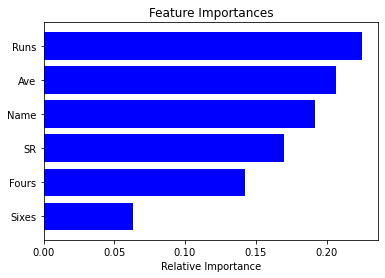

In [322]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the above graph, we can hand pick the top-most features to reduce the dimensionality in our dataset. Here, Runs feature is top most feature. 

#### 5. Principle Component Analysis

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

We applied PCA in Part 1. 

##### 6. Forward Feature Selection
This is the opposite process of the Backward Feature Elimination we saw above. Instead of eliminating features, we try to find the best features which improve the performance of the model. This technique works as follows:

- We start with a single feature. Essentially, we train the model n number of times using each feature separately
The variable giving the best performance is selected as the starting variable
Then we repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained
We repeat this process until no significant improvement is seen in the model’s performance

In [323]:
# Sample implementation
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

dfv = pd.read_csv("CarMPG.csv")
dfv.drop("car_name", axis=1, inplace=True)

dfv = dfv.replace('?', np.nan)
dfv = dfv.dropna()

x = dfv.drop('mpg', axis = 1)
y = dfv['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (274, 7) (274,)
Testing dataset shape: (118, 7) (118,)


In [324]:
lr = LinearRegression()
sfs1 = sfs(lr, k_features=7, forward=True,scoring='r2', cv=5)

In [325]:
# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [326]:
sfs1.get_metric_dict()

{1: {'feature_idx': (3,),
  'cv_scores': array([0.54362205, 0.63041291, 0.67296379, 0.72523906, 0.83173358]),
  'avg_score': 0.6807942791247164,
  'feature_names': ('3',),
  'ci_bound': 0.12351348849845512,
  'std_dev': 0.09609769021095473,
  'std_err': 0.048048845105477356},
 2: {'feature_idx': (3, 5),
  'cv_scores': array([0.76226899, 0.77835551, 0.81740483, 0.79369266, 0.820072  ]),
  'avg_score': 0.7943587984415493,
  'feature_names': ('3', '5'),
  'ci_bound': 0.028616668110338292,
  'std_dev': 0.022264739992113432,
  'std_err': 0.011132369996056716},
 3: {'feature_idx': (3, 5, 6),
  'cv_scores': array([0.73678417, 0.78552131, 0.83472033, 0.81126499, 0.83123571]),
  'avg_score': 0.799905302067549,
  'feature_names': ('3', '5', '6'),
  'ci_bound': 0.046391346852024916,
  'std_dev': 0.0360940439174026,
  'std_err': 0.0180470219587013},
 4: {'feature_idx': (3, 4, 5, 6),
  'cv_scores': array([0.74959364, 0.79388628, 0.83939101, 0.79720461, 0.82331572]),
  'avg_score': 0.800678251575185

- "feature_idx" shows that new feature is adding in each iteration. 

#### 7. Backward Feature Selection
In this technique, at a given iteration, the selected classification algorithm is trained on n input features. Then we remove one input feature at a time and train the same model on n-1 input features n times. The input feature whose removal has produced the smallest increase in the error rate is removed, leaving us with n-1 input features. The classification is then repeated using n-2 features, and so on. Each iteration k produces a model trained on n-k features and an error rate e(k). Selecting the maximum tolerable error rate, we define the smallest number of features necessary to reach that classification performance with the selected machine learning algorithm

In [327]:
#Sample implementation
lr = LinearRegression()
sfs1 = sfs(lr, k_features=1, forward=False,scoring='r2', cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

sfs1.get_metric_dict()


{7: {'feature_idx': (0, 1, 2, 3, 4, 5, 6),
  'cv_scores': array([0.75802669, 0.79772072, 0.83156692, 0.77515557, 0.82680944]),
  'avg_score': 0.797855868881644,
  'feature_names': ('0', '1', '2', '3', '4', '5', '6'),
  'ci_bound': 0.036699182737086354,
  'std_dev': 0.02855321096131013,
  'std_err': 0.014276605480655066},
 6: {'feature_idx': (1, 2, 3, 4, 5, 6),
  'cv_scores': array([0.75906949, 0.8018868 , 0.83291027, 0.78034993, 0.8274598 ]),
  'avg_score': 0.8003352578718292,
  'feature_names': ('1', '2', '3', '4', '5', '6'),
  'ci_bound': 0.03590338356494404,
  'std_dev': 0.027934052169469974,
  'std_err': 0.013967026084734989},
 5: {'feature_idx': (1, 3, 4, 5, 6),
  'cv_scores': array([0.7626739 , 0.80212805, 0.83297302, 0.78094667, 0.83055148]),
  'avg_score': 0.80185462321046,
  'feature_names': ('1', '3', '4', '5', '6'),
  'ci_bound': 0.03526577446894955,
  'std_dev': 0.027437970631109643,
  'std_err': 0.013718985315554821},
 4: {'feature_idx': (3, 4, 5, 6),
  'cv_scores': array(

- "feature_idx" shows that feature is getting removed in each iteration.

### 2. Is it possible to do the dimenstional reduction on a multimedia data [images and video] and text data ?

Yes, it is possible do the dimentional reduction on multimedia data (Images and Video) and text data.

#### PCA implementation on image

In [328]:
#Import libraries
import cv2
from sklearn.decomposition import PCA

In [329]:
# Read the image
img = cv2.imread("sample_img1.png")

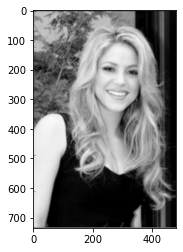

In [330]:
# Plot the image
plt.imshow(img)

In [331]:
# Splitting the image in R,G,B arrays.
 
blue,green,red = cv2.split(img) 
#it will split the original image into Blue, Green and Red arrays.

In [332]:
lstimg = []

components = [5, 10, 20, 40, 60, 80, 100, 150]

for i in components:
    #initialize PCA 
    pca = PCA(i)
 
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
 
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
 
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)
    
    #Reconstructing the original dimensions from the reduced dimensions
    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
    
    lstimg.append(img_compressed)

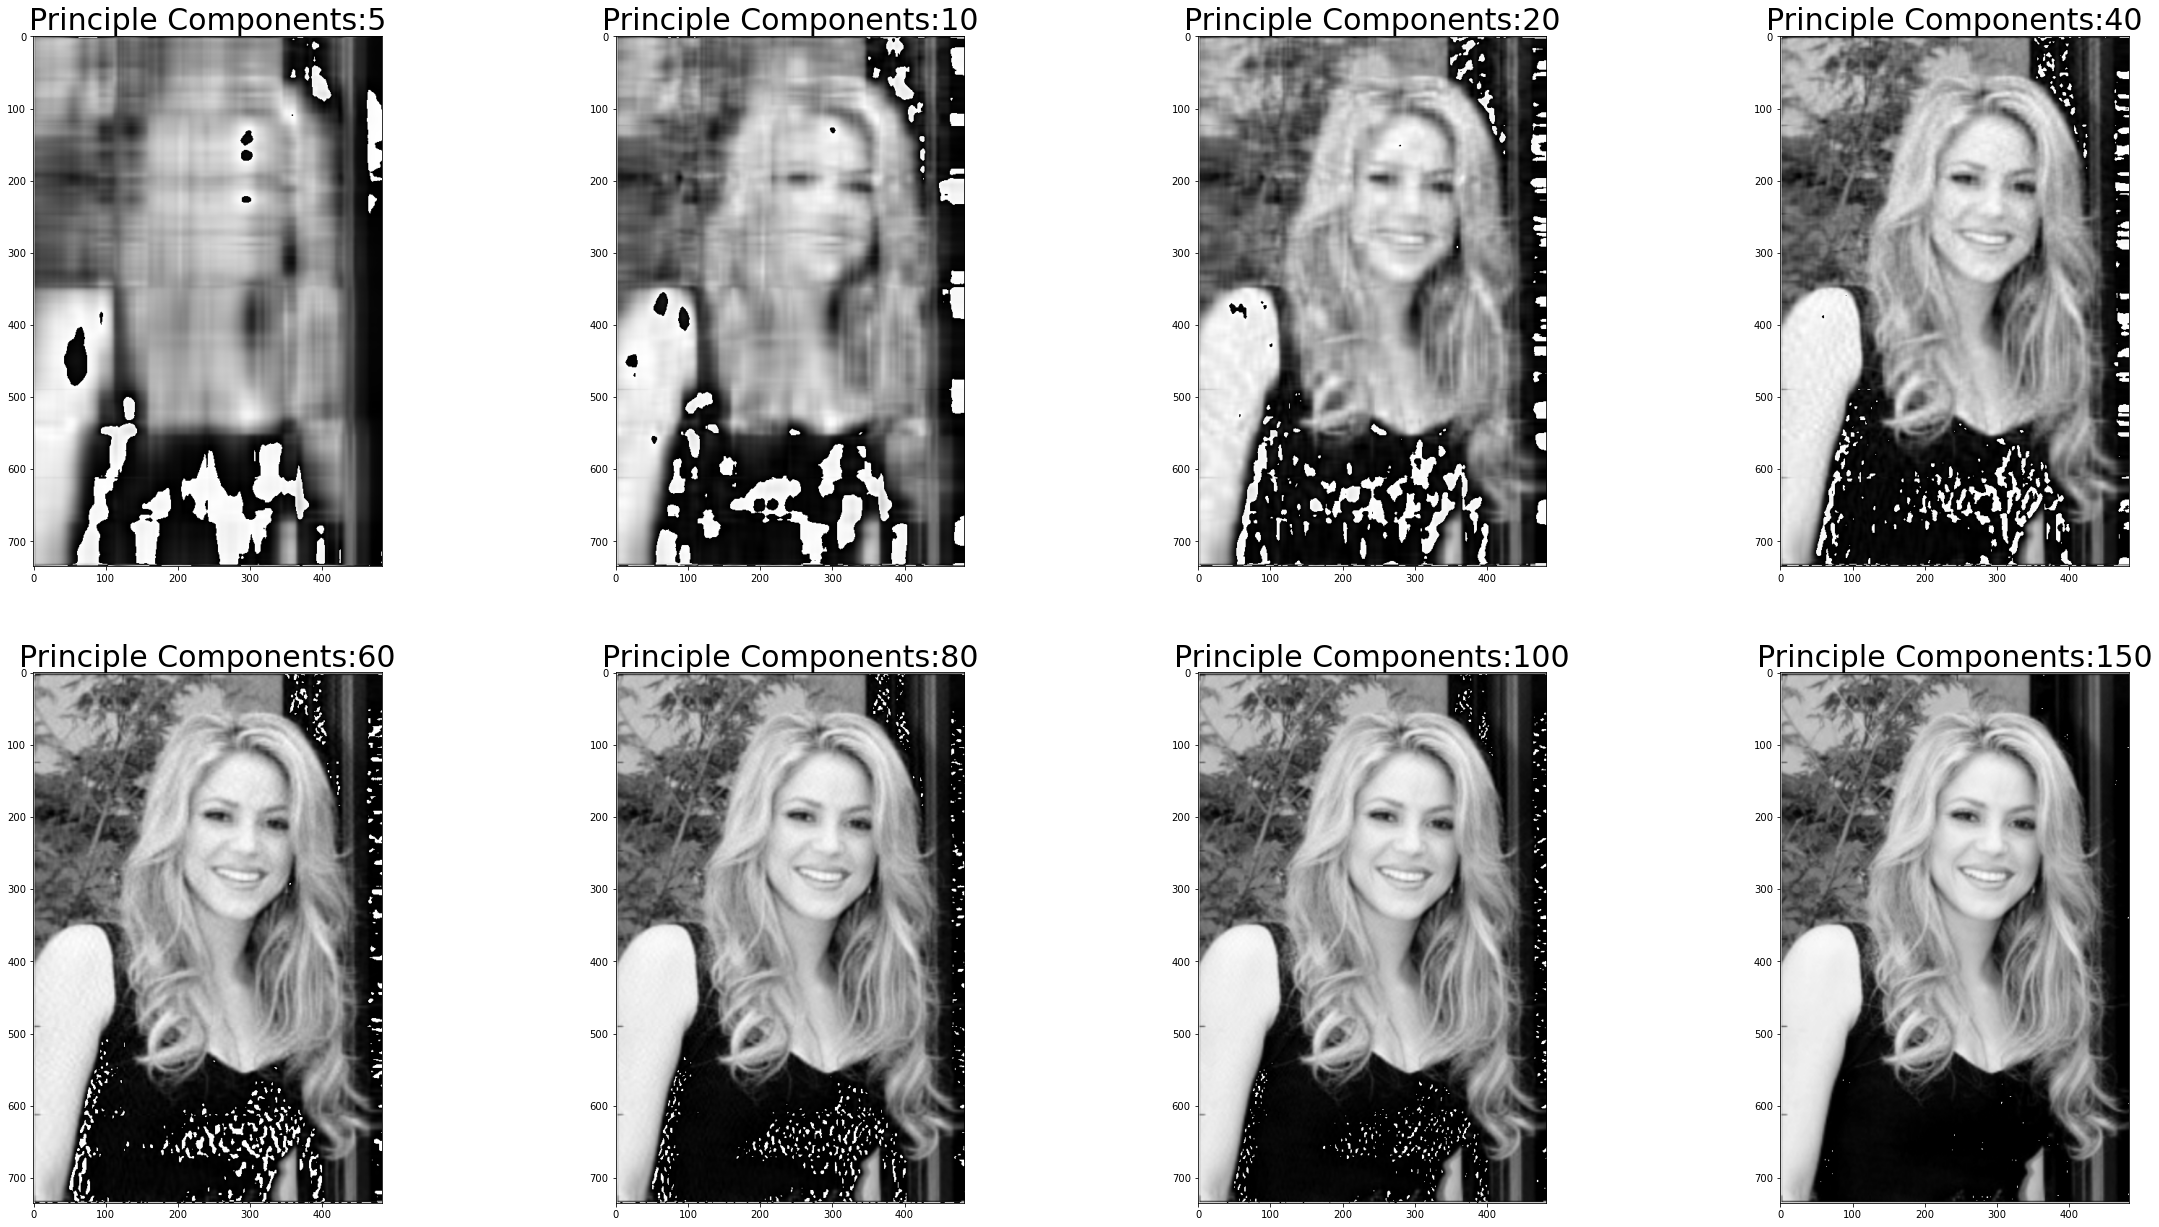

In [333]:
# Plotting the image after PCA
plt.figure(figsize=(40,80))
for i in range(0, 8):
    ax = plt.subplot(7,4,i+1)
    plt.imshow(lstimg[i])
    ax.set_title("Principle Components:" + str(components[i]), fontsize=30)
   

<b>Observations:</b>
- Images are not clear with PCA components 5, 10 and 20. When we increase the principle components, we are getting better images. Principle components 150 gives high quality image like original one.  

#### PCA implementation on text data

In [334]:
# Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [335]:
# Read the dataset and store into dataframe
dftext = pd.read_csv("imdb_data.csv")

In [336]:
# Store text data only
dftext_final = dftext["Text"].head(100)
dftext_final.head()

0    Bromwell High is a cartoon comedy. It ran at t...
1    Homelessness (or Houselessness as George Carli...
2    Brilliant over-acting by Lesley Ann Warren. Be...
3    This is easily the most underrated film inn th...
4    This is not the typical Mel Brooks film. It wa...
Name: Text, dtype: object

In [337]:
# Split train and test set
X_train, X_test = train_test_split(dftext_final, test_size=.30, random_state=10)

In [338]:
# Convert text into feature vectors for train and test set
vectorizer_x = TfidfVectorizer(max_features=75000)
X_train = vectorizer_x.fit_transform(X_train).toarray()
X_test = vectorizer_x.transform(X_test).toarray()
print("tf-idf with",str(np.array(X_train).shape[1]),"features")

tf-idf with 3323 features


In [339]:
# Apply PCA
pca = PCA(n_components=20)
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

In [340]:
print("train with old features: ",np.array(X_train).shape)
print("train with new features:" ,np.array(X_train_new).shape)

print("test with old features: ",np.array(X_test).shape)
print("test with new features:" ,np.array(X_test_new).shape)

train with old features:  (70, 3323)
train with new features: (70, 20)
test with old features:  (30, 3323)
test with new features: (30, 20)


<b>Observation:</b>
- There are 3323 features in original dataset. After applying PCA with 20 compoments, the feature size is reduced to 20 in train and test sets. 

## End Project